# Large-scale machine learning

## Stochastic gradient descent

(Classical) gradient descent (GD) can be computationally expensive when $m$ (number of examples) is large.
Stochastic gradient descent (SGD) is one of the algorithms which can be better suited for large-scale machine learning problems.
In a contrast to GD, SGD use a _single_ example in each algorithm iteration (while GD uses $m$ examples at once).

$$
J(\theta) = \frac1m\sum_{i=1}^m \text{cost}(\theta, x_i, y_i), 
$$

where 

$$
\text{cost}(\theta, x_i, y_i) = \frac12[h_\theta(x_i)-y_i]^2.
$$

Vectorized update for parameters can be described in the following way

$$ \Delta \theta \to \Delta \theta -\alpha  x_i^{\mathsf T}[x_i \theta - y_i], $$

where index $i$ corresponds to the example during the given iteration.

## Batched gradient descent

Batched gradient descent (BGD) is similar to SGD but uses $m_b$ examples during each step. The vectorized update for parameters during each iteration can be described as follows

$$
\Delta \theta \to \Delta \theta - \frac \alpha b x^{\mathsf T}_b[x_b \theta - y_b],
$$

where index $b$ corresponds to the given batched examples, i.e. $x_b = [ x_{b_1}^{\mathsf T}, x_{b_2}^{\mathsf T}, \dots, x_{b_{m_b}}^{\mathsf T} ]^{\mathsf T}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
def cost(theta, x, y):
    return 1. / x.shape[0] * ((x @ theta - y)**2).sum()

def gradient_descent(theta, x, y, max_iter=1000, alpha=0.1, record_path=None):
    if type(record_path) is list:
        record_path.append(theta.copy().flatten())

    for _ in range(max_iter):
        theta -= alpha / x.shape[0] * x.T @ (x @ theta - y)
        if type(record_path) is list:
            record_path.append(theta.copy().flatten())
      
    return theta

def stochastic_gradient_descent(theta, x, y, max_iter=10, alpha=0.1, random_shuffle=True, record_path=None, ):
    if type(record_path) is list:
        record_path.append(theta.copy().flatten())

    if random_shuffle:
        x, y = shuffle(x, y, random_state=42)

    for _ in range(max_iter):
        for i in range(x.shape[0]):
            theta -= alpha * ((x[i] @ theta - y[i]) * x[i]).reshape(theta.shape)
            if type(record_path) is list:
                record_path.append(theta.copy().flatten())

    return theta

def batched_gradient_descent(theta, x, y, batch_size=4, max_iter=10, alpha=0.1, random_shuffle=True, record_path=None):
    if type(record_path) is list:
        record_path.append(theta.copy().flatten())

    if random_shuffle:
        x, y = shuffle(x, y, random_state=42)

    for _ in range(max_iter):
        for i in range(int(np.ceil(x.shape[0] / batch_size))):
            bi = batch_size * i
            bj = batch_size * (i + 1)
            x_batch = x[bi:bj]
            y_batch = y[bi:bj]
            theta -= alpha / x_batch.shape[0] * x_batch.T @ (x_batch @ theta - y_batch)

            if type(record_path) is list:
                record_path.append(theta.copy().flatten())

    return theta

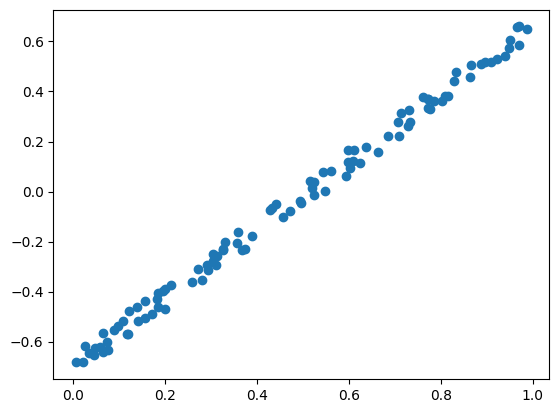

In [3]:
np.random.seed(42)

m = 100
x = np.random.rand(m, 1)
X = np.hstack((np.ones((m, 1)), x))
y = 1.35 * x - 0.74 + 0.1 * np.random.rand(m, 1)
theta = np.random.rand(2, 1)

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

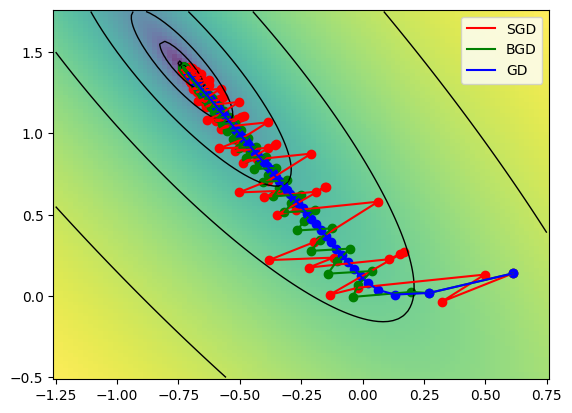

In [4]:
np.random.seed(42)

m = 10
x = np.random.rand(m, 1)
X = np.hstack((np.ones((m, 1)), x))
y = 1.35 * x - 0.74 + 0.1 * np.random.rand(m, 1)
theta = np.random.rand(2, 1)

trajectory_gd = []
gradient_descent(theta.copy(), X, y, max_iter=100, alpha=.5, record_path=trajectory_gd)
trajectory_gd = np.array(trajectory_gd)

trajectory_sgd = []
stochastic_gradient_descent(theta.copy(), X, y, max_iter=10, alpha=.5, record_path=trajectory_sgd)
trajectory_sgd = np.array(trajectory_sgd)

trajectory_mbgd = []
batched_gradient_descent(theta.copy(), X, y, batch_size=4, max_iter=100, alpha=.5, record_path=trajectory_mbgd)
trajectory_mbgd = np.array(trajectory_mbgd)

fig, ax = plt.subplots()

p = np.linspace(-1.25, 0.75, 100)
q = np.linspace(-.5, 1.75, 100)
P, Q = np.meshgrid(p, q)
PQ = np.hstack((P.flatten().reshape(-1, 1), Q.flatten().reshape(-1, 1)))
cost = ((PQ @ X.T - y.T)**2).sum(axis=1).reshape(P.shape) / X.shape[0]

plt.contour(P, Q, np.log(cost), colors=['black'], linewidths=[1], linestyles=['solid'])
ax.pcolormesh(P, Q, np.log(cost), alpha=.75)

ax.scatter(trajectory_sgd[:, 0], trajectory_sgd[:, 1], color='red')
ax.plot(trajectory_sgd[:, 0], trajectory_sgd[:, 1], label="SGD", color='red')
ax.scatter(trajectory_mbgd[:, 0], trajectory_mbgd[:, 1], color='green')
ax.plot(trajectory_mbgd[:, 0], trajectory_mbgd[:, 1], label="BGD", color='green')
ax.scatter(trajectory_gd[:, 0], trajectory_gd[:, 1], color='blue')
ax.plot(trajectory_gd[:, 0], trajectory_gd[:, 1], label="GD", color='blue')

ax.legend()
plt.show()